# Solar Radiation and the Ever Changing 
 
@author = Gavin Drake  
@date = 2023-03-30  
@license = MIT -- https://opensource.org/licenses/MIT

# Introduction: 
This project will take solar radiation, precipitation, temperature, and other atmospheric data to monitor seasonality changes in North Orini, Maine. Monitoring variables in the environment is vital to discover reasons for varibility between the seasons over time. As climate change is an ever pressing matter, knowing what is causing increased varibility is important to distinguish a root cause of this to create policy that will be most effective.

Question/Hypothesis: 
What environmental varibles contribute to increased varibility in seasonality over time?

# Site: 
30 miles North of Orono, Maine (US-Ho2)
    Elevation: 60m
    Location: Howland Forest, Evergreen Needleleaf Forests
    Climate: Warm Summer Continental 

Data: From AmeriFlux
    Date: 1999-2020
    Name: Daily Project Data.csv
    Location: C:\Users\Gavin\OneDrive\Documents\HDA lecture\Project

In [2]:
# Importing modules

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [3]:
#Specifying parameters: Such as date, in file names, etc
infile_name = 'Daily Project Data.csv'

fig_title = 'North Orono, ME'


In [4]:
#Loading Data: using the methods from Lab 6 to load data
    
#loading data and removing -9999 values
def readscan(filename):
   data = pd.read_csv(infile_name, comment = '#', parse_dates = ['TIMESTAMP'],
                      index_col = ['TIMESTAMP'], na_values = ('-9999'))
   data = data.resample('D').mean()
   data = data.rename(columns={'P_F': 'Precip', 'TA_F': 'Air_Temp'})
   data.replace([np.nan], 0, inplace = True)
   return data

data = readscan(infile_name)


In [5]:
#For Loop

columns= ['G', 'H', 'LE', 'SW_IN', 'SW_OUT', 'LW_IN', 'LW_OUT', 'TA', 'TS', 'Precip', 'NETRAD', 'Air_Temp']
for c in columns:
     if c in data.columns.tolist():
         pass
     else:
         data[c]=data.filter(like=c+'_', axis=1).mean(axis=1)
data = data[columns]


In [6]:
#Calculations

# Rolling Command

data['7_day_AT'] = data['Air_Temp'].rolling(7, center = False).mean()

data['7_day_Rad'] = data['NETRAD'].rolling(7, center = False).mean()

startdate=data.loc[(data.index.month==10)&(data.index.day==1)].index[0]
enddate=data.loc[(data.index.month==9)&(data.index.day==30)].index[-1]
data=data[startdate:enddate]


creates a new column in the data file that looks averages the data from a 7 day period into one variable throughout a water year. This then continues for every water year in the data.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


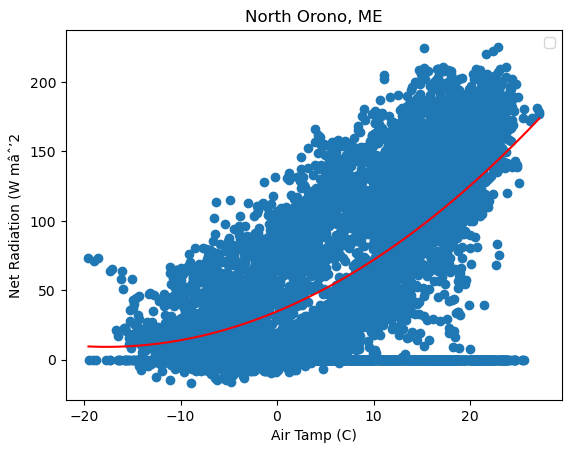

In [7]:
#Plot 1 

# Plot scatter plot
fig, ax = plt.subplots()
ax.scatter(data['7_day_AT'],data['7_day_Rad'])
x=data['7_day_AT']
y=data['7_day_Rad']
coefficients = np.polyfit(x, y, 2)

# Plotting the best-fit line
x_fit = np.linspace(min(x), max(x), num=100)
y_fit = coefficients[0]*(x_fit)**2+ coefficients[1] * x_fit + coefficients[2]
plt.plot(x_fit, y_fit, color='red')

# Add x-axis label
ax.set_xlabel('Air Tamp (C)')

# Add y-axis label
ax.set_ylabel('Net Radiation (W mâˆ’2')

# Add plot title
ax.set_title(fig_title)

# Add legend
ax.legend()


In [8]:
#Monthly Seasonality Calc.


# Add columns (month, water_year,day_of_year)
data['month']=data.index.month
data['water_year']=data.index.year
data.loc[data['month']>9,'water_year']= data.loc[data['month']>9,'water_year'] +1
data['day_of_year']=data.index.dayofyear

# Annual data series
data_annual = data.groupby('water_year')['Precip'].sum()

# Calculations
P = np.mean(data_annual) #avg annual total precip (mm/year)

# Average monthly precipitation
P_month = P/12

# New dataframe for monthly data
data_monthly = data.groupby('month')[['day_of_year']].median()

# Creating new precip column in new dataframe
data_monthly['Precip'] = np.NAN

for i in range(1,13):
    pmonth = data.loc[data['month']==i,['Precip', 'water_year']]
    monthmean = pmonth.groupby('water_year').sum().mean()
    data_monthly.loc[i,'Precip'] = monthmean[0]
    

C:\Users\Gavin\AppData\Local\Temp\ipykernel_19896\2486163739.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


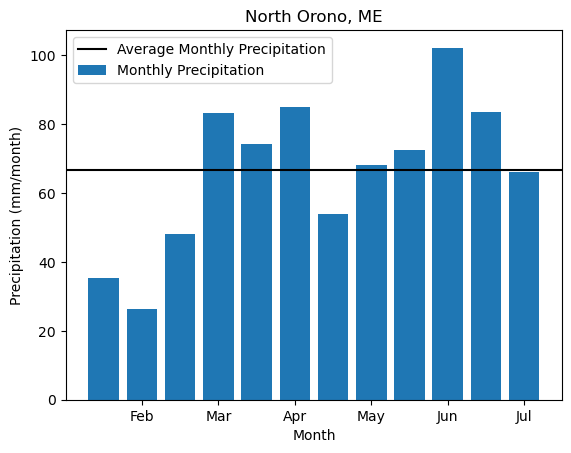

In [9]:
#Bar Chart

fig, ax = plt.subplots()

# Plot monthly precipitation
ax.bar(data_monthly.index, data_monthly['Precip'], label='Monthly Precipitation')

# Plot average monthly precipitation
ax.axhline(P_month, ls='-', color='k', label='Average Monthly Precipitation')

# Add x-axis label
ax.set_xlabel('Month')

# Add y-axis label
ax.set_ylabel('Precipitation (mm/month)')

# Add plot title
ax.set_title(fig_title)

# Add legend
ax.legend()

# Change x-axis tick labels to month names
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()


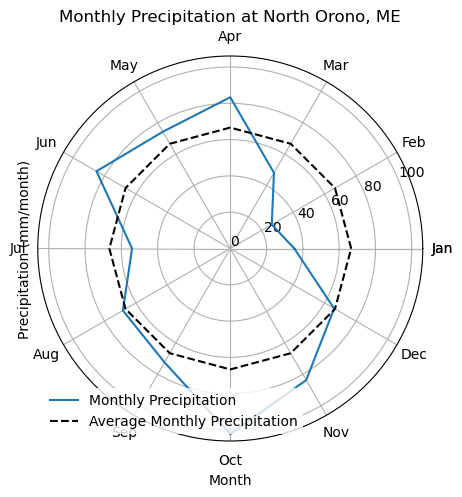

In [10]:
#Create Polar Plot

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='polar')

# Plot monthly precipitation
theta = np.linspace(0, 2*np.pi, 13)
r = data_monthly['Precip'].tolist()
r.append(r[0])
ax.plot(theta, r)

# Add circular line for average monthly precipitation
avg_precip = np.ones(13) * data_monthly['Precip'].mean()
ax.plot(theta, avg_precip, color='k', linestyle='--')

# Set x-axis (theta) labels to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']
ax.set_xticks(theta)
ax.set_xticklabels(month_names)

# Set radial axis (r) ticks
ax.set_yticks(np.arange(0, 110, 20))

# Add labels, legend, and title
ax.set_xlabel('Month')
ax.set_ylabel('Precipitation (mm/month)')
ax.set_title('Monthly Precipitation at North Orono, ME')
legend = ax.legend(['Monthly Precipitation', 'Average Monthly Precipitation'], loc='lower left')
legend.get_frame().set_linewidth(0)

# Display plot
plt.show()


KeyError: 'WS'

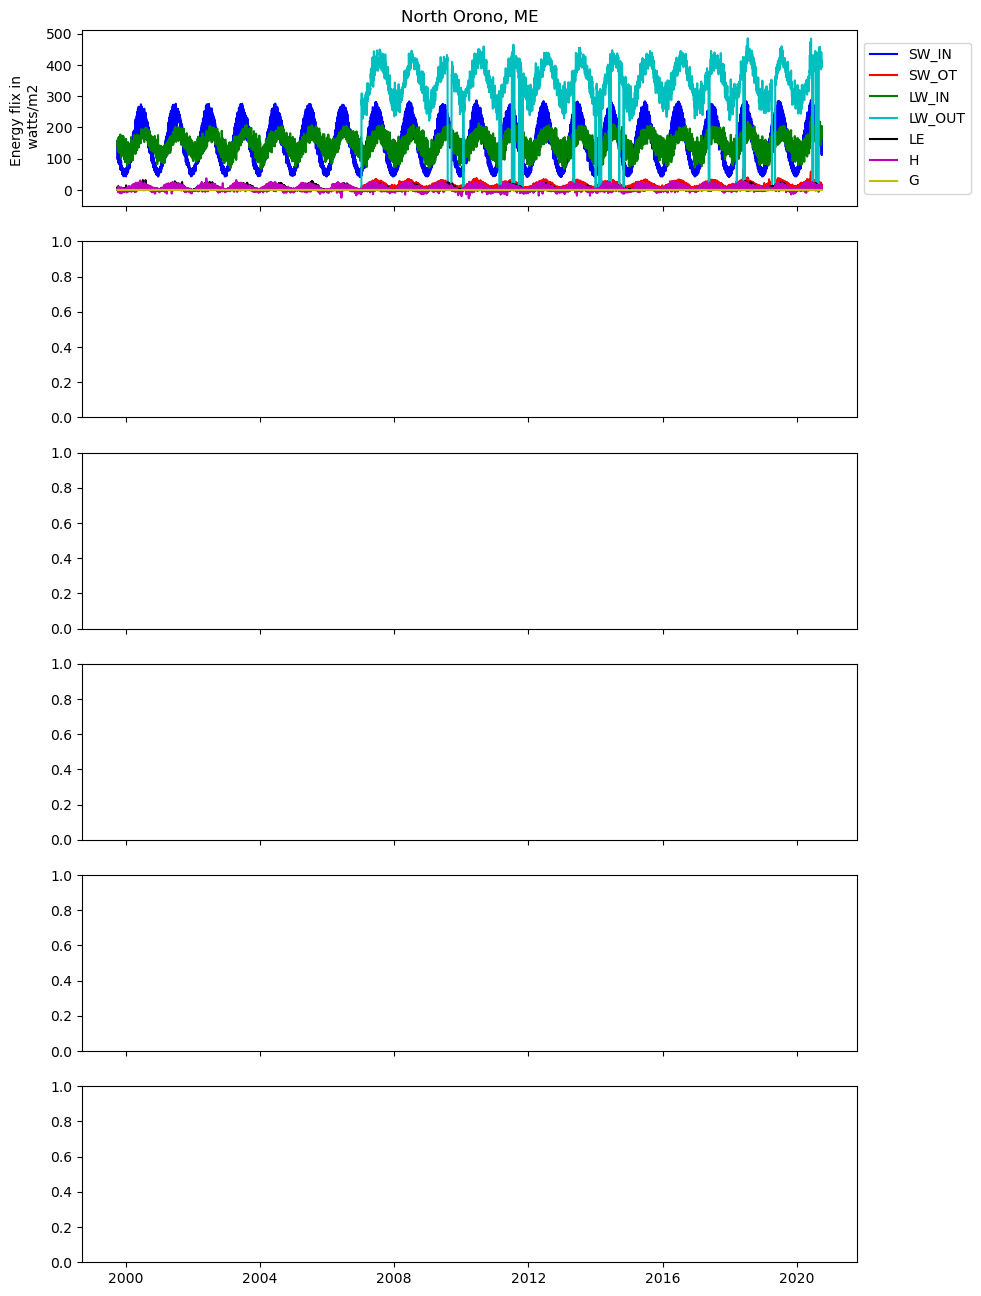

In [11]:
#%% Plotting Shorter Time Series

# Creating plots
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1, 
figsize = (10,16), sharex = True)

ax1.plot(data['SW_IN'], 'b-', label = 'SW_IN')
ax1.plot(data['SW_OUT'], 'r-', label = 'SW_OT')
ax1.plot(data['LW_IN'], 'g-', label = 'LW_IN')
ax1.plot(data['LW_OUT'],'c-', label = 'LW_OUT')
ax1.plot(data['LE'], 'k-', label = 'LE')
ax1.plot(data['H'],'m-', label = 'H') 
ax1.plot(data['G'], 'y-', label = 'G')
ax1.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))

# Add plot components (ax1 - 9)
ax1.set_ylabel('Energy flix in \n watts/m2')
ax1.set_title(fig_title)

ax2.plot(data['WS'],'b-', label = 'WS')
ax2.set_ylabel('Wind Speed \n m/s')
ax2.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))

ax3.plot(data['Air_Temp'], 'b-', label = 'Air Temperature')
ax3.plot(data['TS'], 'r-', label = 'Soil Temperatue')
ax3.set_ylabel('Temperature in \n degrees C')
ax3.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))

ax4.plot(data['CO2'],'b-', label = 'CO2')
ax4.set_ylabel('Mole Fraction CO2')
ax4.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))


ax5.plot(data['Precip'],'b-', label = 'P')
ax5.set_ylabel('Precipitation \n mm')
ax5.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))

ax6.plot(data['NETRAD'], 'r-', label = 'Net Radiation')
ax6.set_ylabel('Net radiation \n watts/m2')
ax6.set_title(fig_title)
ax6.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))



In [12]:
#%% Seasonality change calc

# First, convert the daily data into monthly data
df_monthly = data[columns].resample('M').mean()

# Next, create a new column for the year
df_monthly['year'] = df_monthly.index.year

# Now, group the data by year and calculate the standard deviation for each variable
df_monthly_std = df_monthly.groupby('year').std()


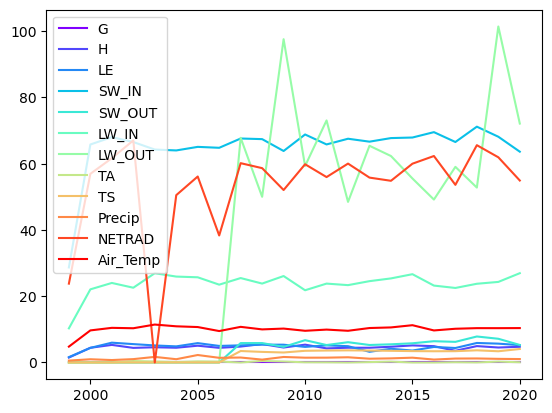

In [13]:
#%% Plot seasonality change

# Set 14 colors using numpy's linspace function
colors = plt.cm.rainbow(np.linspace(0, 1, len(df_monthly_std.columns)))

# Plot each variable with its corresponding color
for i, col in enumerate(df_monthly_std.columns):
    ax= plt.plot(df_monthly_std.index, df_monthly_std[col], color=colors[i], label=col)

# Add legend
plt.legend()


# Results:


# Conclusion: 
from this code I will gain experience in using methods from lectures and past labs and generate 4 plots using statistical analysis methods from lecture. Glodal climate change is a major issue however, knowing what is causing changes to seasonality, will allow scientists to pin point what is contributing the most to climate change. 